- Universidad de Guadalajara
- Centro Universitario de Ciencias Exactas e Ingenierías
- Seminario de Solución de Problemas de Inteligencia Artificial II
- Dr. Diego Oliva
- Depto. De Ciencias Computacionales
- Practica 1_2
- Perceptrón Simple y Multicapa

# Ejercicio 2:
Realizar un programa que permita generar un conjunto de particiones de entrenamiento
considerando un dataset. El programa debe permitir seleccionar la cantidad e particiones y el
porcentaje de patrones de entrenamiento y prueba. Para verificar su funcionamiento se debe realizar
lo siguiente:

In [7]:
import numpy as np
import random
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn import metrics 
from sklearn.model_selection import KFold # import KFold


## Se define el perceptrón de una sola capa

In [8]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0
def perceptron(X, y, lr, epochs, pretrained = None, pretrained_synaptic_weights = None):
    m, n = X.shape
    #Se crea en vector de pesos de la neurona 
    # con valores aleatorios y bias
    if pretrained == False:
        synaptic_weights = np.zeros((n+1,1))
    elif pretrained != False:
        synaptic_weights = pretrained_synaptic_weights.copy()
    n_error_list = []
    #El algoritmo de entrenamiento se ejecuta por el total de iteraciones
    for epoch in range(epochs):
        n_error = 0
        for idx, x_i in enumerate(X):     
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
             #Se realiza la multiplicación punto por punto de la entrada y los pesos. 
            y_hat = step_func(np.dot(x_i.T, synaptic_weights))
            # Actualizar error
            if (np.squeeze(y_hat) - y[idx]) != 0:
                synaptic_weights += lr*((y[idx] - y_hat)*x_i)
                n_error += 1
    n_error_list.append(n_error)            
    print("synaptic_weights: ", synaptic_weights)
    error_porcentual = (abs((len(X) - n_error_list[0]) - len(X)) / len(X)) * 100
    print("Error porcentual: ", error_porcentual)
    return synaptic_weights, error_porcentual


## Se definen las funciones de activación para las capas ocultas y la de salida

In [9]:
# activation function for output layer
def linear(z, derivative=False):
    a = z.copy()
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
def logistic(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
def softmax(z, derivative=False):
    e = np.exp(z - np.max(z, axis=0))
    a = e / np.sum(e, axis=0)
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
# activation functions for hidden layers
def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a

def relu(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a

def logistic_hidden(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a

## Se define la clase de la red de múltipes capas

In [10]:
class MLP:
    def __init__(self, layers_dims, hidden_activation=tanh, output_activation=logistic):
        self.L = len(layers_dims) - 1
        self.w = [None] * (self.L + 1)
        self.b = [None] * (self.L + 1)
        self.f = [None] * (self.L + 1)
        # initialize weights
        for l in range(1, self.L + 1):
            self.w[l] = -1 + 2 * np.random.rand(layers_dims[l], layers_dims[l - 1])
            self.b[l] = -1 + 2 * np.random.rand(layers_dims[l], 1)
            if l == self.L:
                self.f[l] = output_activation
            else:
                self.f[l] = hidden_activation
    def predict(self, X):
        a = np.asanyarray(X)
        for l in range(1, self.L + 1):
            z = np.dot(self.w[l], a) + self.b[l]
            a = self.f[l](z)
        return a
    def train(self, X, Y, epochs=500, lr=0.1):
        P = X.shape[1]
        for _ in range(epochs):
            for p in range(P):
                # initialize activations
                a = [None] * (self.L + 1)
                da = [None] * (self.L + 1)
                lg = [None] * (self.L + 1)
                # propagation
                a[0] = X[:,p].reshape(-1,1)
                for l in range(1, self.L + 1):
                    z = np.dot(self.w[l], a[l-1]) + self.b[l]
                    a[l], da[l] = self.f[l](z, derivative=True)
                # backpropagation
                for l in range(self.L, 0, -1):
                    if l == self.L:
                        lg[l] = (Y[:,p].reshape(-1,1) - a[l]) * da[l]
                    else:
                        lg[l] = np.dot(self.w[l+1].T, lg[l + 1]) * da[l]
                # gradient descent
                for l in range(1, self.L + 1):
                    self.w[l] += lr * np.dot(lg[l], a[l - 1].T)
                    self.b[l] += lr * lg[l]

-------------------------------

# Ejercicio 1_2_1

Usar el archivo spheres1d10.csv que contiene datos generados en base a la Tabla 1. Estos
datos consideran alteraciones aleatorias (<10%), tal como se muestra en la Figura 1(a).
Usando el perceptrón simple, crear cinco particiones de entrenamiento usando 80% de los
datos y 20% para la generalización.

## Dataset

In [11]:
spheres1d10_dataset  = np.genfromtxt('spheres1d10.csv', delimiter=',')

In [12]:
X = spheres1d10_dataset[:,0:3]
y = spheres1d10_dataset[:,3]

In [13]:
X.shape

(1000, 3)

In [14]:
y.shape

(1000,)

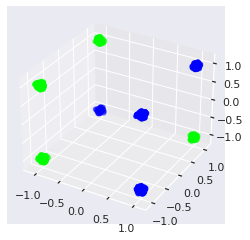

In [15]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], c= y, cmap="brg")

## Perceptrón simple

### Se define el número de divisiones para la validación cruzada de los datos

In [16]:
kf = KFold(n_splits=5, shuffle=True) # Define the split
print(kf.get_n_splits(X)) # returns the number of splitting iterations in the cross-validator
print(kf) 

5
KFold(n_splits=5, random_state=None, shuffle=True)


### Se realiza el entrenamiento con cada división del dataset y se imprime el valor porcentual de cada uno así como el promedio

In [17]:
list_error_porcentual = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
    print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)
    # train
    synaptic_weights, error_porcentual = perceptron(X_train ,y_train, lr = 0.05, epochs = 500, pretrained= False)
    # test
    synaptic_weights, error_porcentual = perceptron(X_test,y_test, lr = 0.0001, epochs = 300, pretrained= True, pretrained_synaptic_weights = synaptic_weights)
    list_error_porcentual.append(error_porcentual)

avg_error_porcentual = sum(list_error_porcentual)/kf.get_n_splits(X)
print('Error porcentual of each fold - {}'.format(list_error_porcentual))
print('Avg error porcentual : {}'.format(avg_error_porcentual))

X_train shape:  (800, 3) y_train shape:  (800,)
X_test shape:  (200, 3) y_test shape:  (200,)
synaptic_weights:  [[-5036.       ]
 [-5076.9081325]
 [   14.8471645]
 [  -44.405576 ]]
Error porcentual:  75.75
synaptic_weights:  [[-5037.71000001]
 [-5078.4199852 ]
 [   14.2782145 ]
 [  -43.8229916 ]]
Error porcentual:  75.5
X_train shape:  (800, 3) y_train shape:  (800,)
X_test shape:  (200, 3) y_test shape:  (200,)
synaptic_weights:  [[-4.84920000e+03]
 [-4.86587232e+03]
 [-2.97331650e+00]
 [-1.51685575e+01]]
Error porcentual:  76.375
synaptic_weights:  [[-4.85079000e+03]
 [-4.86797345e+03]
 [-2.62435740e+00]
 [-1.55542495e+01]]
Error porcentual:  73.0
X_train shape:  (800, 3) y_train shape:  (800,)
X_test shape:  (200, 3) y_test shape:  (200,)
synaptic_weights:  [[-5172.35000001]
 [-5193.0363055 ]
 [  -18.2981535 ]
 [  -20.523776  ]]
Error porcentual:  76.0
synaptic_weights:  [[-5173.46000001]
 [-5194.8392926 ]
 [  -16.9609494 ]
 [  -20.7725708 ]]
Error porcentual:  73.5
X_train shape: 

## Perceptrón Multicapa

### Se define el número de divisiones para la validación cruzada de los datos

In [ ]:
kf = KFold(n_splits=5, shuffle=True) # Define the split
print(kf.get_n_splits(X)) # returns the number of splitting iterations in the cross-validator
print(kf) 

### Se realiza el entrenamiento con cada división del dataset y se imprime el valor porcentual de cada uno así como el promedio

In [60]:
list_error_porcentual = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = X_train.T
    X_test = X_test.T
    y_train = np.expand_dims(y_train, axis=0)
    y_test = np.expand_dims(y_test, axis=0)

    print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
    print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)
    # train
    net = MLP((3,200,1),hidden_activation = relu, output_activation = logistic)
    net.train(X_train, y_train,  epochs=1000, lr=0.01)
    # test
    y_pred = net.predict(X_test)
    y_pred = np.where(y_pred == 0., -1., y_pred)
    y_pred = np.where(y_pred > 0, 1., y_pred)
    aprox = (y_test == y_pred).sum()
    error_porcentual = (abs(aprox - y_test.shape[1])/ y_test.shape[1])*100
    list_error_porcentual.append(error_porcentual)

avg_error_porcentual = sum(list_error_porcentual)/kf.get_n_splits(X)
print('Error porcentual of each fold - {}'.format(list_error_porcentual))
print('Avg error porcentual : {}'.format(avg_error_porcentual))

X_train shape:  (3, 800) y_train shape:  (1, 800)
X_test shape:  (3, 200) y_test shape:  (1, 200)


/tmp/ipykernel_25794/1495947191.py:9: RuntimeWarning: overflow encountered in exp
  a = 1/(1 + np.exp(-z))


X_train shape:  (3, 800) y_train shape:  (1, 800)
X_test shape:  (3, 200) y_test shape:  (1, 200)
X_train shape:  (3, 800) y_train shape:  (1, 800)
X_test shape:  (3, 200) y_test shape:  (1, 200)
X_train shape:  (3, 800) y_train shape:  (1, 800)
X_test shape:  (3, 200) y_test shape:  (1, 200)
X_train shape:  (3, 800) y_train shape:  (1, 800)
X_test shape:  (3, 200) y_test shape:  (1, 200)
Error porcentual of each fold - [0.0, 0.0, 0.0, 12.0, 0.0]
Avg error porcentual : 2.4


# Ejercicio 1_2_2

Considerando la Tabla 1, modificar el punto x=[-1, +1, -1] → yd = 1. Con esto se genera un
nuevo dataset. Los archivos spheres2d10.csv, spheres2d50.csv y spheres2d70.csv contienen
los datos perturbados en un 10%, 50% y 70% y se presentan en las Figuras 1 (b), (c), (d).
mediante el perceptrón simple realizar una clasificación con 10 particiones usando 80% de
los datos y 20% para la generalización.

## Dataset


In [5]:
spheres2d10_dataset  = np.genfromtxt('spheres2d10.csv', delimiter=',')
spheres2d50_dataset  = np.genfromtxt('spheres2d50.csv', delimiter=',')
spheres2d70_dataset  = np.genfromtxt('spheres2d70.csv', delimiter=',')

### Se concatenan los datasets

In [6]:
spheres_dataset = np.concatenate((spheres2d10_dataset,spheres2d50_dataset,spheres2d70_dataset)) 

In [7]:
X = spheres_dataset[:,0:3]
y = spheres_dataset[:,3]

In [8]:
X.shape

(15000, 3)

In [9]:
y.shape

(15000,)

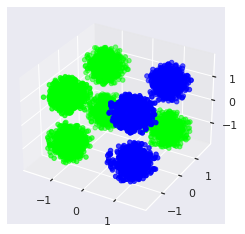

In [10]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], c= y, cmap="brg")

## Perceptrón simple

### Se define el número de divisiones para la validación cruzada de los datos

In [15]:
kf = KFold(n_splits=10, shuffle=True) # Define the split
print(kf.get_n_splits(X)) # returns the number of splitting iterations in the cross-validator
print(kf) 

10
KFold(n_splits=10, random_state=None, shuffle=True)


### Se realiza el entrenamiento con cada división del dataset y se imprime el valor porcentual de cada uno así como el promedio

In [17]:
list_error_porcentual = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
    print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)
    # train
    synaptic_weights, error_porcentual = perceptron(X_train ,y_train, lr = 0.05, epochs = 500, pretrained= False)
    # test
    synaptic_weights, error_porcentual = perceptron(X_test,y_test, lr = 0.0001, epochs = 300, pretrained= True, pretrained_synaptic_weights = synaptic_weights)
    list_error_porcentual.append(error_porcentual)

avg_error_porcentual = sum(list_error_porcentual)/kf.get_n_splits(X)
print('Error porcentual of each fold - {}'.format(list_error_porcentual))
print('Avg error porcentual : {}'.format(avg_error_porcentual))

X_train shape:  (13500, 3) y_train shape:  (13500,)
X_test shape:  (1500, 3) y_test shape:  (1500,)
synaptic_weights:  [[ -47397.00000051]
 [-119981.62732551]
 [  43718.20842449]
 [ -50053.60219294]]
Error porcentual:  61.20740740740741
synaptic_weights:  [[ -47401.83000039]
 [-119996.38809685]
 [  43724.27254257]
 [ -50058.6495237 ]]
Error porcentual:  58.599999999999994
X_train shape:  (13500, 3) y_train shape:  (13500,)
X_test shape:  (1500, 3) y_test shape:  (1500,)
synaptic_weights:  [[ -46337.40000045]
 [-118778.28081953]
 [  43259.956681  ]
 [ -49027.97513843]]
Error porcentual:  60.72592592592593
synaptic_weights:  [[ -46343.85000029]
 [-118794.10843159]
 [  43266.86710868]
 [ -49034.57267602]]
Error porcentual:  62.06666666666667
X_train shape:  (13500, 3) y_train shape:  (13500,)
X_test shape:  (1500, 3) y_test shape:  (1500,)
synaptic_weights:  [[ -45826.65000042]
 [-118282.28901195]
 [  44753.24124799]
 [ -48296.07400195]]
Error porcentual:  60.95555555555555
synaptic_weigh

## Perceptrón Multicapa

### Se define el número de divisiones para la validación cruzada de los datos

In [11]:
kf = KFold(n_splits=10, shuffle=True) # Define the split
print(kf.get_n_splits(X)) # returns the number of splitting iterations in the cross-validator
print(kf) 

10
KFold(n_splits=10, random_state=None, shuffle=True)


### Se realiza el entrenamiento con cada división del dataset y se imprime el valor porcentual de cada uno así como el promedio

In [13]:
list_error_porcentual = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = X_train.T
    X_test = X_test.T
    y_train = np.expand_dims(y_train, axis=0)
    y_test = np.expand_dims(y_test, axis=0)

    print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
    print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)
    # train
    net = MLP((3,5,1),hidden_activation = relu, output_activation = logistic)    # test
    net.train(X_train, y_train,  epochs=1000, lr=0.01)
    # test
    y_pred = net.predict(X_test)
    y_pred = np.where(y_pred == 0., -1., y_pred)
    y_pred = np.where(y_pred > 0, 1., y_pred)
    aprox = (y_test == y_pred).sum()
    error_porcentual = (abs(aprox - y_test.shape[1])/ y_test.shape[1])*100
    list_error_porcentual.append(error_porcentual)

avg_error_porcentual = sum(list_error_porcentual)/kf.get_n_splits(X)
print('Error porcentual of each fold - {}'.format(list_error_porcentual))
print('Avg error porcentual : {}'.format(avg_error_porcentual))

X_train shape:  (3, 13500) y_train shape:  (1, 13500)
X_test shape:  (3, 1500) y_test shape:  (1, 1500)


/tmp/ipykernel_13523/1495947191.py:9: RuntimeWarning: overflow encountered in exp
  a = 1/(1 + np.exp(-z))


X_train shape:  (3, 13500) y_train shape:  (1, 13500)
X_test shape:  (3, 1500) y_test shape:  (1, 1500)
X_train shape:  (3, 13500) y_train shape:  (1, 13500)
X_test shape:  (3, 1500) y_test shape:  (1, 1500)
X_train shape:  (3, 13500) y_train shape:  (1, 13500)
X_test shape:  (3, 1500) y_test shape:  (1, 1500)
X_train shape:  (3, 13500) y_train shape:  (1, 13500)
X_test shape:  (3, 1500) y_test shape:  (1, 1500)
X_train shape:  (3, 13500) y_train shape:  (1, 13500)
X_test shape:  (3, 1500) y_test shape:  (1, 1500)
X_train shape:  (3, 13500) y_train shape:  (1, 13500)
X_test shape:  (3, 1500) y_test shape:  (1, 1500)
X_train shape:  (3, 13500) y_train shape:  (1, 13500)
X_test shape:  (3, 1500) y_test shape:  (1, 1500)
X_train shape:  (3, 13500) y_train shape:  (1, 13500)
X_test shape:  (3, 1500) y_test shape:  (1, 1500)
X_train shape:  (3, 13500) y_train shape:  (1, 13500)
X_test shape:  (3, 1500) y_test shape:  (1, 1500)
Error porcentual of each fold - [0.33333333333333337, 1.06666666

## Conclusiones

Al utilizar datastes de 3 dimensiones no separables linealmente, pude observar el mismo rendimiento que con 2 dimensiones de la práctica pasada. La red de una sola capa solamente fue capaz de clasificar correctamente con un promedio de 60% de error con diferentes configuraciones. En comparación con una red de múltiples capas no fue necesario aumentar la complejidad de los hiperparámetros porque no mejoraba más el error porcentual. 

En cada iteración, aunque el modelo tuviera la misma configuración, si variaba el error porcentual. Como los pesos sinápticos se están modificando en cada iteración, es fácil corroborar que el error va disminuyendo, pero en algunos casos aumento también, El último ejemplo empezó en 0.33%, el error más alto fue de 1.33% y el más bajo además del último fue de 0.2%. Esto significa que es importante durante la evaluación corroborar el rendimiento con diferentes sets del dataset para evitar el sobre entrenamiento, y de analizar porque se comporta diferente con la variedad de los datos.